<a href="https://colab.research.google.com/github/Kimutai12345/data-science/blob/main/data_science_asn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 0.21
Predicted Accident Severity: 3.66


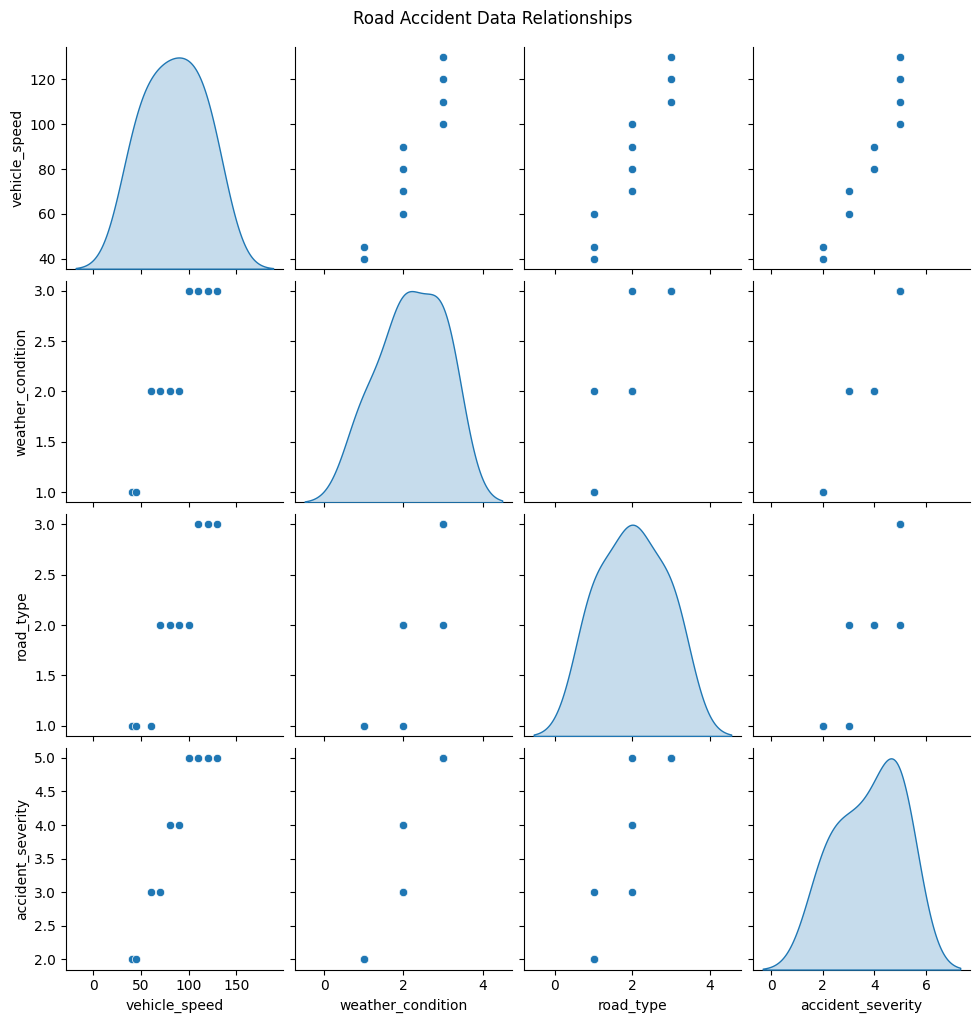

In [1]:
# Step 1: Install required libraries (if not already installed)
!pip install pandas scikit-learn matplotlib seaborn

# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib  # For saving the model

# Step 3: Create a sample dataset (replace this with your real dataset)
data = {
    'vehicle_speed': [40, 60, 80, 100, 120, 45, 70, 90, 110, 130],
    'weather_condition': [1, 2, 2, 3, 3, 1, 2, 2, 3, 3],  # 1=Clear, 2=Rainy, 3=Foggy
    'road_type': [1, 1, 2, 2, 3, 1, 2, 2, 3, 3],          # 1=Urban, 2=Highway, 3=Rural
    'accident_severity': [2, 3, 4, 5, 5, 2, 3, 4, 5, 5]   # Severity scale: 1 (low) to 5 (high)
}
df = pd.DataFrame(data)

# Step 4: Define dependent and independent variables
X = df[['vehicle_speed', 'weather_condition', 'road_type']]  # Independent variables
y = df['accident_severity']                                  # Dependent variable

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Step 8: Save the model
joblib.dump(model, 'accident_severity_model.pkl')

# Step 9: Predict using hypothetical data
hypothetical_data = pd.DataFrame({
    'vehicle_speed': [85],
    'weather_condition': [2],  # Rainy
    'road_type': [2]           # Highway
})
predicted_severity = model.predict(hypothetical_data)
print(f"Predicted Accident Severity: {predicted_severity[0]:.2f}")

# Step 10: Visualize relationships
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Road Accident Data Relationships", y=1.02)
plt.show()
